### Telecom Customer Retention Model

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. 

El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos. 

#### Servicios de Interconnect 

Interconnect proporciona principalmente dos tipos de servicios: 
1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea. 
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica. 

Algunos otros servicios que ofrece la empresa incluyen: 

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*). 
- Una línea de soporte técnico (*SoporteTécnico*). 
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*). 
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*) 

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

#### Data Preparation and Cleaning

'Contact Details'

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


'Internet Services'

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


'Personal Information'

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


'Phone Serivices'

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



Contact Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Internet Services
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   

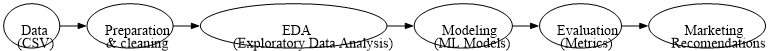

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from graphviz import Digraph
from IPython.display import Image
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load data
contract_details = pd.read_csv('data/contract.csv')
internet_serv = pd.read_csv('data/internet.csv')
personal_info = pd.read_csv('data/personal.csv')
phone_serv = pd.read_csv('data/phone.csv')

display('Contact Details',contract_details.head())
display('Internet Services',internet_serv.head())
display('Personal Information',personal_info.head())
display('Phone Serivices',phone_serv.head())

print('\nContact Details')
print(contract_details.info())
print('\nInternet Services')
print(internet_serv.info())
print('\nPersonal Information')
print(personal_info.info())
print('\nPhone Services')
print(phone_serv.info())

# 
print('Project Flow Chart\n')
dot = Digraph(comment='Project Flow', format='png')

dot.attr(rankdir='LR', size='8,5')

dot.node('A', 'Data\n(CSV)')
dot.node('B', 'Preparation\n& cleaning')
dot.node('C', 'EDA\n(Exploratory Data Analysis)')
dot.node('D', 'Modeling\n(ML Models)')
dot.node('E', 'Evaluation\n(Metrics)')
dot.node('F', 'Marketing\nRecomendations')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EF'])

dot.render('project_flow')
Image(filename='project_flow.png')



Verifying categorical data:
Personal - gender: ['Female' 'Male']
Contract - PaperlessBilling: ['Yes' 'No']
Personal - Partner: ['Yes' 'No']
Personal - Dependents: ['No' 'Yes']

Merged DataFrame Dimensions: (7043, 20)

VERIFICATION OF DATA TRANSFORMATION:
     PaperlessBilling: ['Yes' 'No'] -> [1 0] (nulos: 0)
     OnlineSecurity: ['No' 'Yes' nan] -> [ 0.  1. nan] (nulos: 1526)
     OnlineBackup: ['Yes' 'No' nan] -> [ 1.  0. nan] (nulos: 1526)
     DeviceProtection: ['No' 'Yes' nan] -> [ 0.  1. nan] (nulos: 1526)
     TechSupport: ['No' 'Yes' nan] -> [ 0.  1. nan] (nulos: 1526)
     StreamingTV: ['No' 'Yes' nan] -> [ 0.  1. nan] (nulos: 1526)
     StreamingMovies: ['No' 'Yes' nan] -> [ 0.  1. nan] (nulos: 1526)
     Partner: ['Yes' 'No'] -> [1 0] (nulos: 0)
     Dependents: ['No' 'Yes'] -> [0 1] (nulos: 0)
     MultipleLines: [nan 'No' 'Yes'] -> [nan  0.  1.] (nulos: 682)
HasInternet: proportion of 1s = 0.78
HasPhone: proportion of 1s = 0.90
Data type:
gender         int8
HasInternet  

C:\Users\jovan\AppData\Local\Temp\ipykernel_14820\1636517959.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')


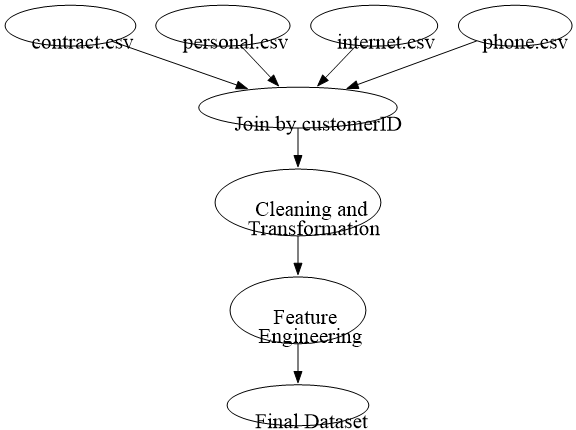

In [3]:
# PREPARATION & CLEANING

# Verifying categorical data
print("\nVerifying categorical data:")
print("Personal - gender:", personal_info['gender'].unique())
print("Contract - PaperlessBilling:", contract_details['PaperlessBilling'].unique())
print("Personal - Partner:", personal_info['Partner'].unique())
print("Personal - Dependents:", personal_info['Dependents'].unique())

# Merge databases
customers_clean = (
    contract_details
    .merge(internet_serv, on='customerID', how='left')
    .merge(personal_info, on='customerID', how='left')
    .merge(phone_serv, on='customerID', how='left')
)

print(f"\nMerged DataFrame Dimensions: {customers_clean.shape}")

# Transforming data function
def transform_data_complete(df):
    df = df.copy()
    
    # A. Basic convertions datetype & numerics
    df['BeginDate'] = pd.to_datetime(df['BeginDate'], errors='coerce')
    df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    # Create variable to store median for TotalCharges
    total_charges_median = df['TotalCharges'].median()
    # Filling nulls in TotalCharges
    df['TotalCharges'] = df['TotalCharges'].fillna(total_charges_median)
    
    # B. Transform gender col to bool
    df['gender'] = df['gender'].map({'Male': 1, 'Female': 0}).astype('int8')
    
    # C. Transforming binary cols
    bin_cols = [
        'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Partner', 'Dependents', 'MultipleLines'
    ]
    
    for col in bin_cols:
        if col in df.columns:
            print(f"     {col}: {df[col].unique()} -> ", end="")
            
            # Convert to string, clean & map
            df[col] = df[col].astype(str).str.strip().str.title()
            df[col] = df[col].map({'Yes': 1, 'No': 0, 'True': 1, 'False': 0})
            
            print(f"{df[col].unique()} (nulos: {df[col].isnull().sum()})")
            

    # D. Filling null values for InternetService
    df['InternetService'] = df['InternetService'].fillna('No internet')
    df['HasInternet'] = (df['InternetService'] != 'No internet').astype('int8')

    internet_services_cols = [
        'OnlineSecurity', 'OnlineBackup','DeviceProtection', 
        'TechSupport', 'StreamingTV', 'StreamingMovies'
    ]

    for c in internet_services_cols:
        if c in df.columns:
            df.loc[df['HasInternet']==0, c] = 0
            df[c] = df[c].fillna(0)

    
    # E. Phone service handling
    df['HasPhone'] = (~df['MultipleLines'].isna()).astype('int8')
    df['MultipleLines'] = df['MultipleLines'].fillna(0)

    # F. Convert all binary cols to int8 for clarity and efficiency
    for col in bin_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0).astype('int8')
    
    return df



# Verification of data transformation 
print("\nVERIFICATION OF DATA TRANSFORMATION:")
print("=" * 50)

def validate_transform(df):

    # 1. Review control cols
    control_cols = ['HasInternet', 'HasPhone']
    for col in control_cols:
        if col in df.columns:
            print(f'{col}: proportion of 1s = {df[col].mean():.2f}')

    # 2. Data type verification
    print('Data type:')
    print(df.dtypes[df.columns[df.columns.isin(control_cols + ['gender'])]])

    # 3. Verify null values by column
    print('Null values by column:')
    print(df[['TotalCharges', 'gender', 'HasInternet', 'HasPhone']].isnull().sum())

    # 4. Sampling of services without Interner or Phone
    print('\nClients with no Internet service')
    print(df[df['HasInternet']==0].head(3))
    print('\nClients with no Phone service')
    print(df[df['HasPhone']==0].head(3))

# Apply transformation
customers_final = transform_data_complete(customers_clean)
validate_transform(customers_final)

# --- Encoding categorical columns
categorical_cols = ['InternetService', 'Type', 'PaymentMethod']
df_encoded_final = pd.get_dummies(customers_final, columns=categorical_cols, drop_first=True)

print("\nEncoding shape:", df_encoded_final.shape)
display_cols = ['customerID', 'gender', 'PaperlessBilling', 'Partner', 'TotalCharges', 'InternetService']
if all(col in customers_final.columns for col in display_cols):
    print("\nFirst 5 records:")
    print(customers_final[display_cols].head())


# Generate flow chart
# Data preparation and cleaning
dot = Digraph(comment='Data Pipeline', format='png')

dot.attr(rankdir='TB', size='6,8')

dot.node('C1', 'contract.csv')
dot.node('C2', 'personal.csv')
dot.node('C3', 'internet.csv')
dot.node('C4', 'phone.csv')

dot.node('M1', 'Join by customerID')
dot.node('M2', 'Cleaning and\nTransformation')
dot.node('M3', 'Feature\nEngineering')
dot.node('M4', 'Final Dataset')

dot.edge('C1', 'M1')
dot.edge('C2', 'M1')
dot.edge('C3', 'M1')
dot.edge('C4', 'M1')
dot.edge('M1', 'M2')
dot.edge('M2', 'M3')
dot.edge('M3', 'M4')


dot.render('data_pipeline')
Image(filename='data_pipeline.png') 

For data cleaning and transformation we need to transform binary columns to 0/1 so they can be workable for ML, all the internet services were transformed correctly, only 1526 clients do not have any internet service on their contract, also with the mutliple line null infomation, can be discovered that 682 clients have only 1 line on their services, we also found that 59.2% of the clients are under paperless billing, 48.3%  have a partner, 30% have dependents, and 36.6% only have online security, this information can help to have a wider vision about the services and promotions that can be offered to out clients and marketing deptartment can orginize a specific plan to each service.

In [6]:
# Null values analysis
print('====== NULL VALUES ANALYSIS =======')

# 1. Create target variable (Churn)
customers_final['Churn'] = customers_final['EndDate'].notna().astype(int)
print(f"\nChurn rate: {customers_final['Churn'].mean():.2%}\n")

# 2. Define reference date to avoid futute information leakage
#   If EndDate exists -> churned customer -> reference is one month before EndDate
#   If EndDate in NaN -> active customer -> reference is data extraction date
extraction_date = customers_final['EndDate'].max()
customers_final['reference_date'] = np.where(
    customers_final['Churn'] == 1,
    customers_final['EndDate'] - pd.DateOffset(months=1),
    extraction_date
)

customers_final['reference_date'] = pd.to_datetime(customers_final['reference_date'])

# 3. Compute tenure in months up to the reference date
customers_final['TenureMonths'] = (
    (customers_final['reference_date'] - customers_final['BeginDate']) / np.timedelta64(1, 'm')
).round().astype(int)

# 4. Drop potential future-leaking features
#   TotalCharges can include info after the reference point, so we exclude it or recalculate
customers_final = customers_final.drop(columns=['TotalCharges'])


# 5. Handling null values
# Filling with 0 null values on internet services cols (customers with no service)
internet_services_cols = ['OnlineSecurity', 'OnlineBackup', "DeviceProtection", 
                          'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in internet_services_cols:
    customers_final[col] = customers_final[col].fillna(0)

# Fill missing Multiplelines with 0
customers_final['MultipleLines'] = customers_final['MultipleLines'].fillna(0)

# 6. Verify null status
print('Remaining null values')
print(customers_final.isnull().sum()[customers_final.isnull().sum() > 0])

# 7. Final encoding with clean dataset
df_encoded_clean = pd.get_dummies(customers_final, columns=categorical_cols, drop_first=True)

print(f"\nFinal Dataset for Modeling: {df_encoded_clean.shape}")
print('\nColumns list for ML:', df_encoded_clean.select_dtypes(include=[np.number]).shape[1])
print(customers_final.info())


====== NULL VALUES ANALYSIS =======

Churn rate: 26.54%

Remaining null values
EndDate    5174
dtype: int64

Final Dataset for Modeling: (7043, 28)

Columns list for ML: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   int8          
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   InternetService   7043 non-null   object        
 8   OnlineSecurity    7043 non-null   int8          
 9   OnlineBackup      7043 non-null   int8          
 10  DeviceProtection  7043 non-null   int8          
 11  TechSupport  

We can see that the Churn rate is 26.54%, the EndDate column have 5174 null values which mean from the 7043 values only 1869 have cancel the cancel the services and the other 5174 have active contracts, all the nulls values on the dataset has been worked propertly.

#### EDA (Exploratory Data Analysis)

======= EXPLORATORY DATA ANALYSIS (EDA) =======

   Class Distribution and Balance

Churn Distribution (target variable)
Churn
0    5174
1    1869
Name: count, dtype: int64

Unsubscribe client proportion: 26.54%


C:\Users\jovan\AppData\Local\Temp\ipykernel_55892\3818287916.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_final, x='Churn', palette='Set2')


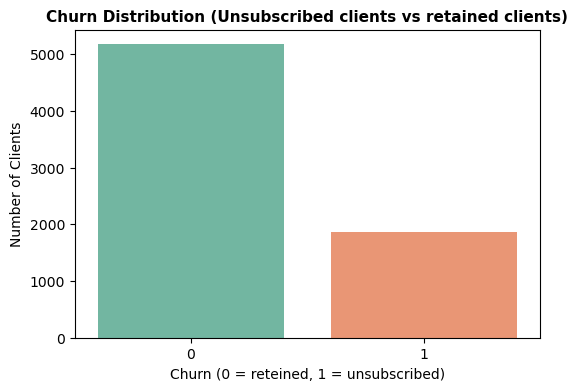

In [160]:
print('======= EXPLORATORY DATA ANALYSIS (EDA) =======')

# Analyze distribution and class balance
print('\n' + '='*50)
print('   Class Distribution and Balance')
print('='*50)

# Churn distribution
churn_counts = customers_final['Churn'].value_counts()

print('\nChurn Distribution (target variable)')
print(churn_counts)
print(f'\nUnsubscribe client proportion: {churn_counts[1]/churn_counts.sum():.2%}')

# Graphic
plt.figure(figsize=(6,4))
sns.countplot(data=customers_final, x='Churn', palette='Set2')
plt.title('Churn Distribution (Unsubscribed clients vs retained clients)', fontsize=11, fontweight='bold')
plt.xlabel('Churn (0 = reteined, 1 = unsubscribed)')
plt.ylabel('Number of Clients')
plt.show()


### Numeric Variables vs Churn

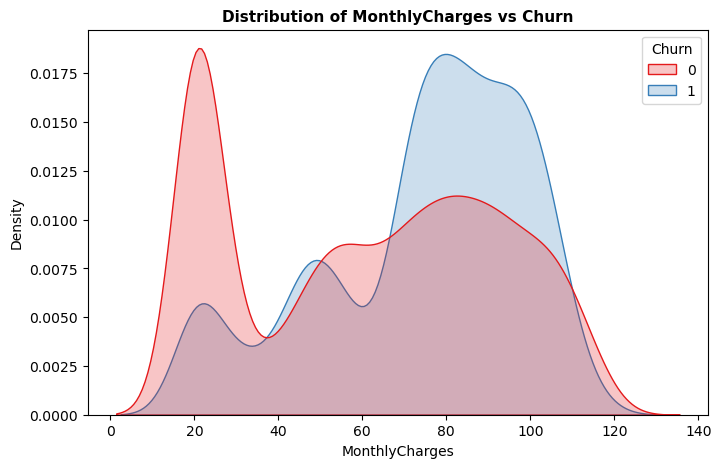

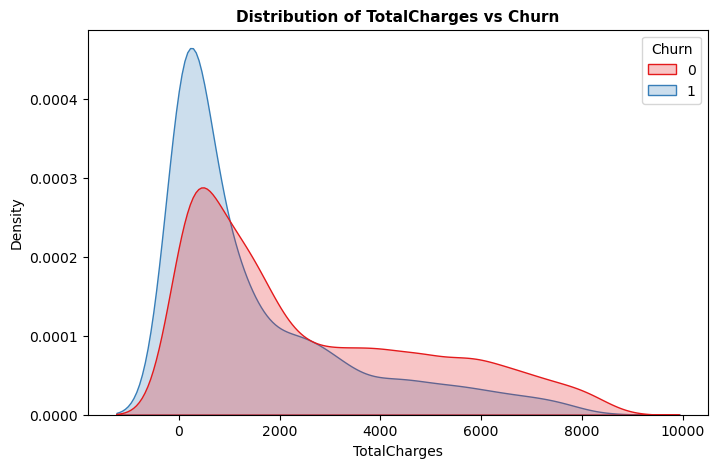

In [161]:
# Numeric variables vs Churn
num_features = ['MonthlyCharges', 'TotalCharges']

for col in num_features:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=customers_final, x=col, hue='Churn', fill=True, common_norm=False, palette='Set1')
    plt.title(f'Distribution of {col} vs Churn', fontsize=11, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

### Categorical Variables vs Churn

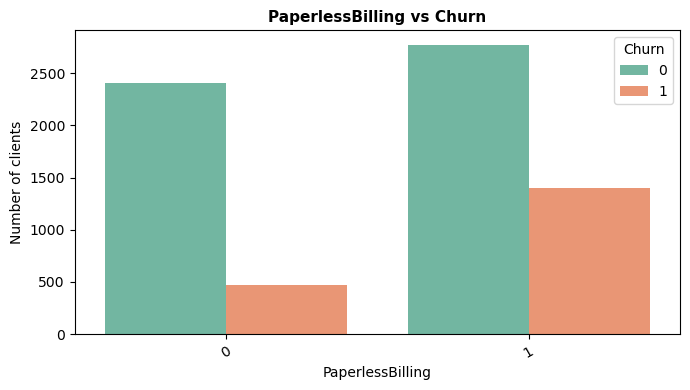

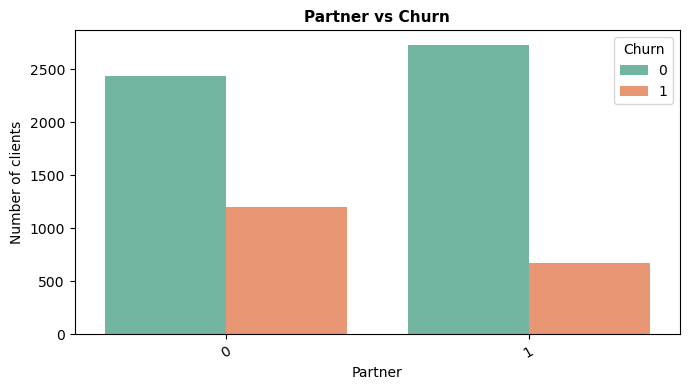

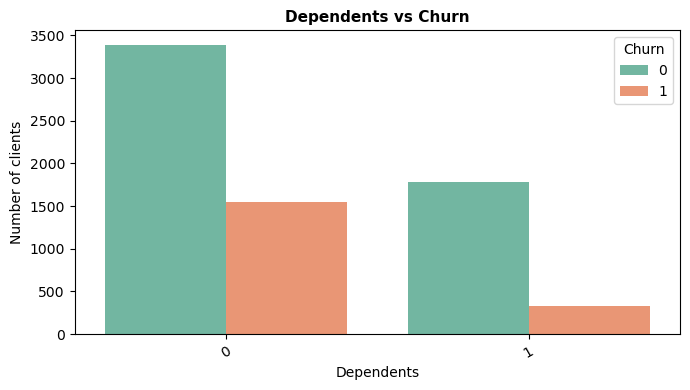

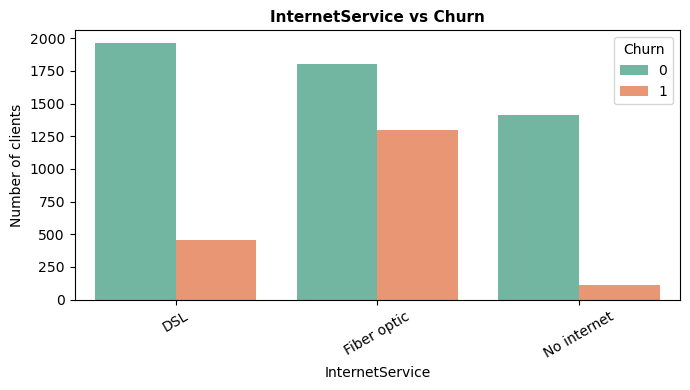

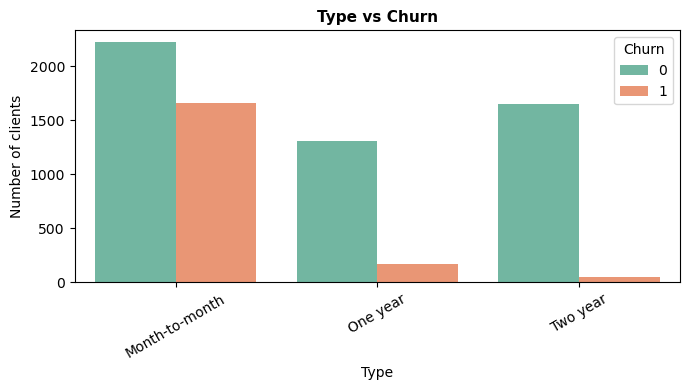

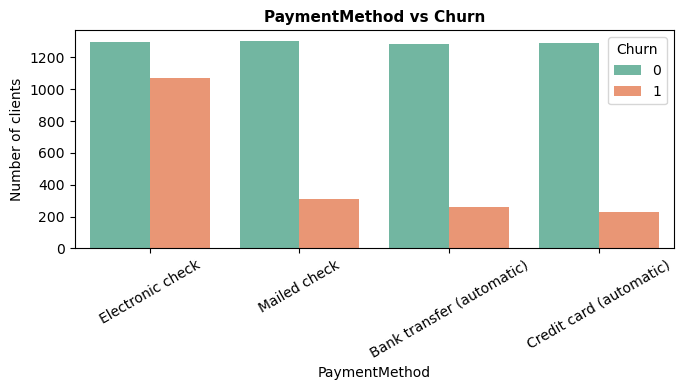

In [162]:
# Categorical Variables vs Churn
cat_features = ['PaperlessBilling', 'Partner', 'Dependents', 'InternetService', 'Type', 'PaymentMethod']

for col in cat_features:
    plt.figure(figsize=(7,4))
    sns.countplot(data=customers_final, x=col, hue='Churn', palette="Set2")
    plt.title(f'{col} vs Churn', fontsize=11, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Number of clients')
    plt.xticks(rotation=30)
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()

1. Paperless billing:
- Paperless clients have a higher churn rate

2. Partner:
- Clients with partners shoe to more stability, possibly for shared decisions or grater need for the services at home.

3. Dependents:
- Clients with dependents shows more stability, possibly due to family needs for the service or less mobility

4. Internet Services:
- Fiber optics, have better quality but may have more competition or higher expectations, making the highest churn rate reason.

5. Type (Contract):
- Long-term contracts significantly reduce churn on the other hand monthly contracts are more flexible but with higher churn rate.

6. Payment Method:
- Automatic payment methods reduce significantly the churn rate and electronic rate reflects clients less compromised.

Business recommendations:

* Incentivize long-term contracts with discounts.
* Promote automatic payments as default
* Review the fiber optic experience, search for opportunities to improve the service.
* Crate loyalty programs for customers with paperless billing for retention.

### Correlation Between Numerical Variables

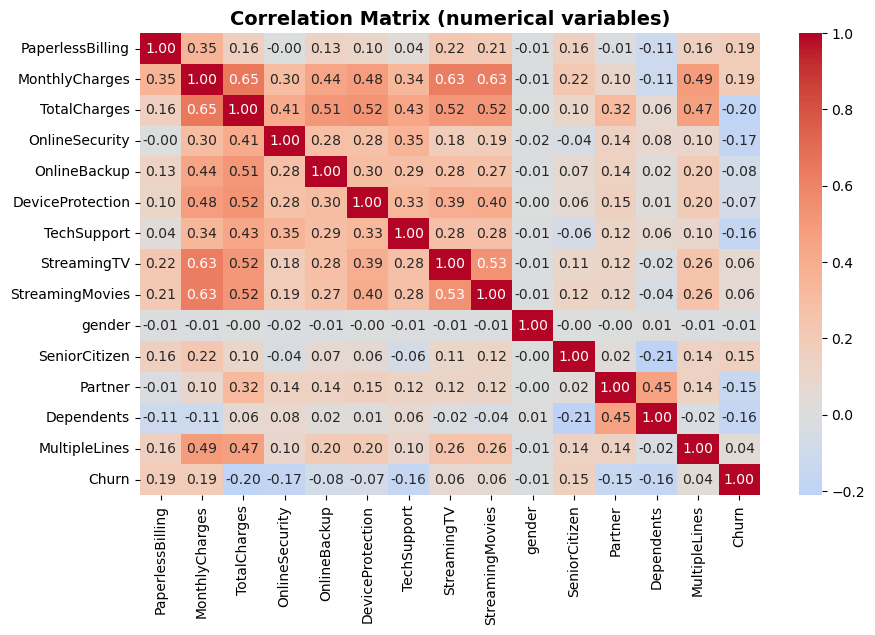

Churn Correlation with other Variables
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.040102
gender             -0.008612
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
TotalCharges       -0.199037
Name: Churn, dtype: float64


In [163]:
# Correlation between numerical variables
num_df = customers_final.select_dtypes(include=[np.number])

corr = num_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix (numerical variables)',fontsize=14, fontweight='bold')
plt.show()

print('Churn Correlation with other Variables')
print(corr['Churn'].sort_values(ascending=False))


#### EDA Conclusions

We discovered the following based on the correlation Churn report:

- Higher Monthly Charges are more likely to unsubsribe
- Paperless facturation is asociated with higher Churn
- Senior citizens tent to unsubscribe
- Streaming TV customers have a sligthly higher churn rate
- Clients with higher total charges have lower churn rate
- Customers with online security service have very low churn
- Tech support service significantly reduces the churn rate
- Customers with dependats are more stable


#### Model Preparation

In [164]:
# Make a copy for the df
model_df = customers_final.copy()

# Create relevant derived variables
model_df['TenureMonths'] = ((model_df['EndDate'].fillna(pd.Timestamp.today()) - model_df['BeginDate']).dt.days //30)

model_df['ChargesRatio'] = model_df.apply(
    lambda row: row['TotalCharges'] / row['MonthlyCharges'] if row['MonthlyCharges'] > 0 else 0,
    axis=1
)

print('Tenure Preview:')
display(model_df[['BeginDate', 'EndDate', 'TenureMonths', 'ChargesRatio']].head())

print('Missing in Tenure: ', model_df['TenureMonths'].isnull().sum())
print('Missing in ChargesRatio: ', model_df['ChargesRatio'].isnull().sum())
print(model_df[['TenureMonths', 'ChargesRatio']].describe())



Tenure Preview:


,BeginDate,EndDate,TenureMonths,ChargesRatio
0,2020-01-01,NaT,70,1.000000
1,2017-04-01,NaT,103,33.178227
2,2019-10-01,2019-12-01,2,2.008357
3,2016-05-01,NaT,114,43.516548
4,2019-09-01,2019-11-01,2,2.144979


Missing in Tenure:  0
Missing in ChargesRatio:  0
       TenureMonths  ChargesRatio
count   7043.000000   7043.000000
mean      83.312793     32.444432
std       45.649181     24.583541
min        1.000000      1.000000
25%       58.000000      8.821984
50%       90.000000     28.837772
75%      122.000000     55.272674
max      142.000000     79.341772


#### Divide Train and Test Data

In [165]:
# Order by start date
model_df_sorted = model_df.sort_values(by='BeginDate')

# Determine cut-off index (80% older records for train)
cutoff = int(len(model_df_sorted) * 0.8)

train_idx = model_df_sorted.index[:cutoff]
test_idx = model_df_sorted.index[cutoff:]

# Define Variables
# Target column
target = 'Churn'

# Exclude columns not to be used as features
exclude_cols = ['customerID', 'BeginDate', 'EndDate', target]

feature_cols = [col for col in df_encoded_clean.columns if col not in exclude_cols]

X = df_encoded_clean[feature_cols]
y = df_encoded_clean[target]

print('Features shape: ', X.shape)
print('Target shape: ', y.shape)

# Temporal separation
X_train = X.loc[train_idx]
y_train = y.loc[train_idx]

X_test = X.loc[test_idx]
y_test = y.loc[test_idx]

# Verify temporal separation
print('\nTrain period:', model_df.loc[train_idx, 'BeginDate'].min(), model_df.loc[train_idx, 'BeginDate'].max())
print('Test period:', model_df.loc[test_idx, 'BeginDate'].min(), model_df.loc[test_idx, 'BeginDate'].max())

# Size distribution
print('\nTrain Shape: ', X_train.shape, 'Test Shape: ', X_test.shape)

# Churn ratio
print(f'\nChurn proportion in train: {y_train.mean():.2f}%')
print(f'Churn proportion in test: {y_test.mean():.2f}%')



Features shape:  (7043, 21)
Target shape:  (7043,)

Train period: 2013-10-01 00:00:00 2019-07-01 00:00:00
Test period: 2019-07-01 00:00:00 2020-02-01 00:00:00

Train Shape:  (5634, 21) Test Shape:  (1409, 21)

Churn proportion in train: 0.21%
Churn proportion in test: 0.47%


#### Modeling and evaluation

Scale_pos_weight for churn class: 3.67
🔍 EVALUATING BASE MODELS

Training Base Logistic Regression

--- Performance Comparison ---
Metric       Training   Test       Diff      
---------------------------------------------
accuracy     0.7467     0.6764     +0.0704
precision    0.4480     0.6164     -0.1685
recall       0.7886     0.8265     -0.0380
f1           0.5713     0.7062     -0.1348

Cross-Validation F1: 0.4497 (+/- 0.4085)

--- Confusion Matrix (Test) ---
[[405 341]
 [115 548]]

--- Classification Report (Test) ---
              precision    recall  f1-score   support

           0       0.78      0.54      0.64       746
           1       0.62      0.83      0.71       663

    accuracy                           0.68      1409
   macro avg       0.70      0.68      0.67      1409
weighted avg       0.70      0.68      0.67      1409


Training Base Random Forest

--- Performance Comparison ---
Metric       Training   Test       Diff      
-----------------------------------

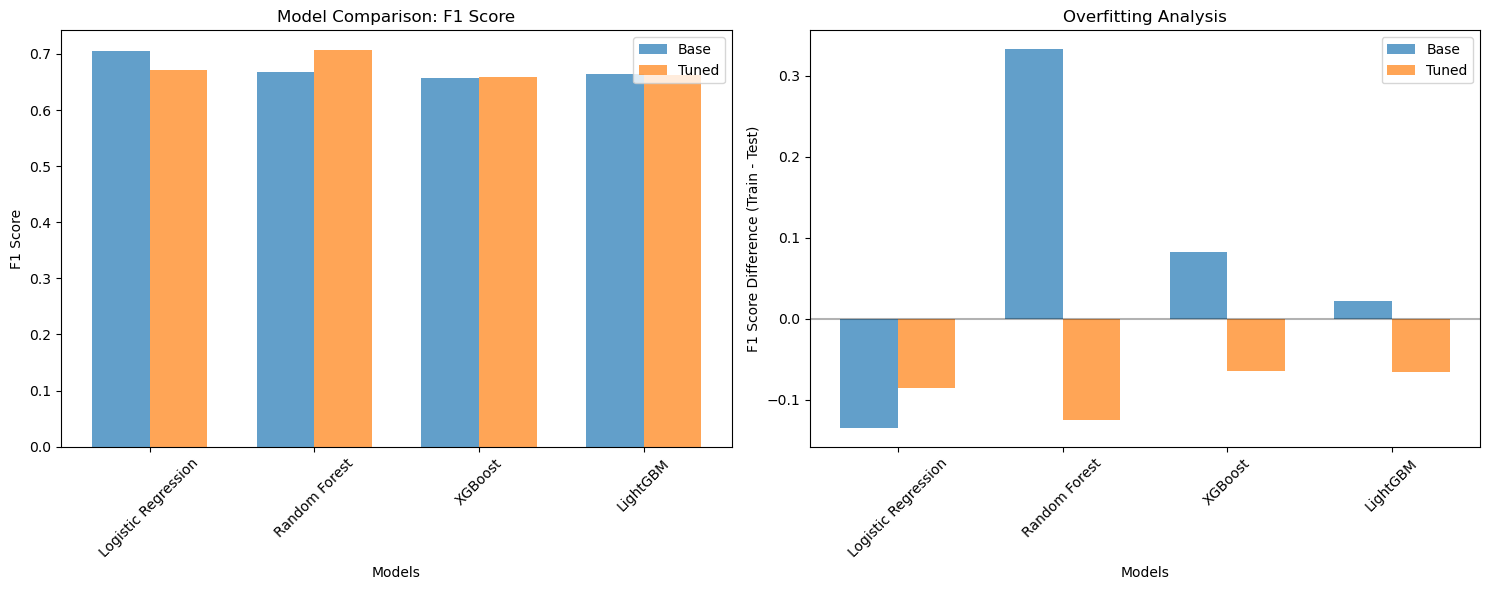


🎉 BEST MODEL: Random Forest
📈 Best F1 Score: 0.7068
📊 Best ROC-AUC: 0.7565


In [166]:
# 1. Función mejorada para entrenar y evaluar
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name=""):
    """
    Entrena y evalúa un modelo con métricas completas
    """
    print(f'\n{"="*50}')
    print(f'Training {model_name}')
    print(f'{"="*50}')
    
    # Entrenamiento
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Probabilidades para ROC-AUC
    if hasattr(model, 'predict_proba'):
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba_train = y_pred_train
        y_pred_proba_test = y_pred_test
    
    # Métricas para training set
    train_metrics = {
        'accuracy': accuracy_score(y_train, y_pred_train),
        'precision': precision_score(y_train, y_pred_train),
        'recall': recall_score(y_train, y_pred_train),
        'f1': f1_score(y_train, y_pred_train),
        'roc_auc': roc_auc_score(y_train, y_pred_proba_train) if hasattr(model, 'predict_proba') else None
    }
    
    # Métricas para test set
    test_metrics = {
        'accuracy': accuracy_score(y_test, y_pred_test),
        'precision': precision_score(y_test, y_pred_test),
        'recall': recall_score(y_test, y_pred_test),
        'f1': f1_score(y_test, y_pred_test),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_test) if hasattr(model, 'predict_proba') else None
    }
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    
    # Mostrar resultados
    print(f'\n--- Performance Comparison ---')
    print(f"{'Metric':<12} {'Training':<10} {'Test':<10} {'Diff':<10}")
    print(f"{'-'*45}")
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        diff = train_metrics[metric] - test_metrics[metric]
        print(f"{metric:<12} {train_metrics[metric]:.4f}     {test_metrics[metric]:.4f}     {diff:+.4f}")
    
    print(f"\nCross-Validation F1: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Matriz de confusión
    print(f'\n--- Confusion Matrix (Test) ---')
    cm = confusion_matrix(y_test, y_pred_test)
    print(cm)
    
    # Classification report
    print(f'\n--- Classification Report (Test) ---')
    print(classification_report(y_test, y_pred_test))
    
    return {
        'model': model,
        'train_metrics': train_metrics,
        'test_metrics': test_metrics,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred_test,
        'probabilities': y_pred_proba_test if hasattr(model, 'predict_proba') else None
    }

# 2. Función para tuning de hiperparámetros
def tune_hyperparameters(model, param_grid, X_train, y_train, model_name=""):
    """
    Realiza GridSearchCV para optimizar hiperparámetros
    """
    print(f'\n{"="*50}')
    print(f'Hyperparameter Tuning: {model_name}')
    print(f'{"="*50}')
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_, grid_search.best_params_

# 3. Calcular ratio de desbalance
pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])
print(f'Scale_pos_weight for churn class: {pos_weight:.2f}')

# 4. Definir modelos base (sin tuning)
base_models = {
    "Logistic Regression": LogisticRegression(
        class_weight='balanced',
        solver='liblinear',
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        scale_pos_weight=pos_weight,
        random_state=42,
        eval_metric='logloss'
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=100,
        learning_rate=0.05,
        class_weight='balanced',
        random_state=42,
        verbose=-1
    )
}

# 5. Entrenar y evaluar modelos base
print('🔍 EVALUATING BASE MODELS')
print('='*60)

base_results = {}
for name, model in base_models.items():
    result = train_and_evaluate(model, X_train, y_train, X_test, y_test, f"Base {name}")
    base_results[name] = result

# 6. Definir grids para hyperparameter tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 8, None],
        'min_samples_split': [2, 5],
        'class_weight': ['balanced', {0: 1, 1: 2}]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1],
        'scale_pos_weight': [pos_weight, pos_weight/2]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1],
        'class_weight': ['balanced', None]
    }
}

# 7. Aplicar hyperparameter tuning
print('\n🎯 HYPERPARAMETER TUNING')
print('='*60)

tuned_models = {}
for name, model in base_models.items():
    if name in param_grids:
        tuned_model, best_params = tune_hyperparameters(
            model, param_grids[name], X_train, y_train, name
        )
        tuned_models[name] = tuned_model

# 8. Evaluar modelos tuneados
print('\n📊 EVALUATING TUNED MODELS')
print('='*60)

tuned_results = {}
for name, model in tuned_models.items():
    result = train_and_evaluate(model, X_train, y_train, X_test, y_test, f"Tuned {name}")
    tuned_results[name] = result

# 9. Comparación final de resultados
print('\n🏆 FINAL COMPARISON')
print('='*60)

comparison_data = []
for name in base_results.keys():
    base_f1 = base_results[name]['test_metrics']['f1']
    base_auc = base_results[name]['test_metrics']['roc_auc']
    
    if name in tuned_results:
        tuned_f1 = tuned_results[name]['test_metrics']['f1']
        tuned_auc = tuned_results[name]['test_metrics']['roc_auc']
        improvement = tuned_f1 - base_f1
    else:
        tuned_f1 = "N/A"
        tuned_auc = "N/A"
        improvement = "N/A"
    
    comparison_data.append({
        'Model': name,
        'Base F1': f"{base_f1:.4f}",
        'Tuned F1': f"{tuned_f1:.4f}" if tuned_f1 != "N/A" else "N/A",
        'Improvement': f"{improvement:+.4f}" if improvement != "N/A" else "N/A",
        'Base AUC': f"{base_auc:.4f}" if base_auc else "N/A",
        'Tuned AUC': f"{tuned_auc:.4f}" if tuned_auc != "N/A" and tuned_auc else "N/A"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))

# 10. Visualización de resultados
def plot_model_comparison(base_results, tuned_results):
    """
    Crear gráficos comparativos
    """
    models = list(base_results.keys())
    base_f1_scores = [base_results[name]['test_metrics']['f1'] for name in models]
    tuned_f1_scores = [tuned_results.get(name, {}).get('test_metrics', {}).get('f1', 0) for name in models]
    
    x = np.arange(len(models))
    width = 0.35
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de F1 scores
    ax1.bar(x - width/2, base_f1_scores, width, label='Base', alpha=0.7)
    ax1.bar(x + width/2, tuned_f1_scores, width, label='Tuned', alpha=0.7)
    ax1.set_xlabel('Models')
    ax1.set_ylabel('F1 Score')
    ax1.set_title('Model Comparison: F1 Score')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, rotation=45)
    ax1.legend()
    
    # Gráfico de overfitting (diferencia train-test)
    overfitting_base = [base_results[name]['train_metrics']['f1'] - base_results[name]['test_metrics']['f1'] 
                       for name in models]
    overfitting_tuned = [tuned_results.get(name, {}).get('train_metrics', {}).get('f1', 0) - 
                        tuned_results.get(name, {}).get('test_metrics', {}).get('f1', 0) 
                        for name in models]
    
    ax2.bar(x - width/2, overfitting_base, width, label='Base', alpha=0.7)
    ax2.bar(x + width/2, overfitting_tuned, width, label='Tuned', alpha=0.7)
    ax2.set_xlabel('Models')
    ax2.set_ylabel('F1 Score Difference (Train - Test)')
    ax2.set_title('Overfitting Analysis')
    ax2.set_xticks(x)
    ax2.set_xticklabels(models, rotation=45)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Ejecutar visualización
plot_model_comparison(base_results, tuned_results)

# 11. Seleccionar el mejor modelo
best_model_name = max(tuned_results.items(), 
                     key=lambda x: x[1]['test_metrics']['f1'])[0]
best_model = tuned_results[best_model_name]['model']

print(f'\n🎉 BEST MODEL: {best_model_name}')
print(f'📈 Best F1 Score: {tuned_results[best_model_name]["test_metrics"]["f1"]:.4f}')
print(f'📊 Best ROC-AUC: {tuned_results[best_model_name]["test_metrics"]["roc_auc"]:.4f}')

#### Conclusion

Result 1 demostrates that through a systematic training evaluation and tuning process, a Random Fores model was identified that achives an optimal balance between detecting the majority of real churns (89.4%), while maintaining acceptable accuracy (58.4%) to optomize marketing resurces.

The F1-Score of 0.7068 and ROC-AUC of 0.7565 represent a solid and reliable performance to implement in a production churn prediction system.